<a href="https://colab.research.google.com/github/krmonline/geneticAlgorithm/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customersID = [1,2,3,4,5,6,7,8,9,10] 
CampaignA = [70,80,90,50,100,110,20,10,0,40]
CampaignB = [60,80,90,50,100,130,20,40,50,40]
CampaignC = [60,70,80,50,100,150,90,80,60,80]
df = pd.DataFrame(customersID,columns=['Customers'])
df['CampaignA'] = CampaignA
df['CampaignB'] = CampaignB
df['CampaignC'] = CampaignC

In [3]:
df

,Customers,CampaignA,CampaignB,CampaignC
0,1,70,60,60
1,2,80,80,70
2,3,90,90,80
3,4,50,50,50
4,5,100,100,100
5,6,110,130,150
6,7,20,20,90
7,8,10,40,80
8,9,0,50,60
9,10,40,40,80


In [4]:
def generator():
    fill = []
    while (len(fill) < 10):
        num = random.randrange(10)
        if num in fill:
            continue
        else:
            fill.append(num)
    return fill

def population(n):
    return [generator() for i in range(n)] 

def numToCampaign(arr):
    allCampaign = ['CampaignA','CampaignA','CampaignA','CampaignB','CampaignB','CampaignB','CampaignC','CampaignC','CampaignC','-']
    out = list(range(len(allCampaign)))
    for i in range(len(arr)):
        out[arr[i]] = allCampaign[i]
    return out

def naming(df):
    for i in range(len(df)):
        df.iloc[i,]

def CampaignToScore(arr):
    out  = []
    for i in range(10):
        if arr[i] == '-':
            v = 0
        else:
            v = df.iloc[i][arr[i]]
        out.append(v)
    return out

def sumScore(arr):
    return np.sum(arr)

def fitnessFuntion(df,n = 2):
    return df.sort_values('sum',ascending=False).iloc[:-n]

def mutation(a):
    global currentID
    a = a.drop(['sum','name'])
    col1 = random.randint(0,9)
    col2 = random.randint(0,9)
    if col1 == col2:
        out = a.values
    else:
        arr_v = a.values
        arr_v[col1],arr_v[col2] = arr_v[col2],arr_v[col1]
        out = arr_v
    s = sumScore(CampaignToScore(out))
    out = pd.Series(out)
    out['sum'] = s
    currentID = currentID + 1
    out['name'] = currentID
    return out


def inital(n):
    global currentID
    a = [numToCampaign(i) for i in population(n)]
    b = [CampaignToScore(i) for i in a]
    c = [sumScore(i) for i in b]
    tmp = pd.DataFrame(a)
    tmp['sum'] = c
    name = []
    for i in range(n):
        name.append(i)
    tmp['name'] = name
    currentID = n
    return tmp

def genNewUser(df,n):
    arr_users =  []
    for i in range(n):
        i = random.randrange(len(df))
        a = df.iloc[i]
        arr_users.append(mutation(a))
    return pd.DataFrame(arr_users)

In [17]:
n = 2
maxValue = 0
d = inital(20)
d

,0,1,2,3,4,5,6,7,8,9,sum,name
0,CampaignB,CampaignC,CampaignB,CampaignB,CampaignC,CampaignA,-,CampaignC,CampaignA,CampaignA,600,0
1,CampaignA,CampaignC,CampaignB,CampaignC,-,CampaignA,CampaignC,CampaignA,CampaignB,CampaignB,580,1
2,CampaignC,CampaignA,CampaignA,-,CampaignC,CampaignC,CampaignB,CampaignA,CampaignB,CampaignB,600,2
3,CampaignB,CampaignA,CampaignA,CampaignC,CampaignB,CampaignC,CampaignB,CampaignA,-,CampaignC,640,3
4,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,CampaignC,CampaignA,-,CampaignB,670,4
5,CampaignA,CampaignB,CampaignA,-,CampaignA,CampaignB,CampaignC,CampaignC,CampaignC,CampaignB,740,5
6,CampaignB,CampaignA,CampaignB,-,CampaignC,CampaignC,CampaignA,CampaignA,CampaignC,CampaignB,610,6
7,CampaignB,CampaignC,-,CampaignC,CampaignB,CampaignC,CampaignA,CampaignA,CampaignA,CampaignB,500,7
8,CampaignA,CampaignB,-,CampaignC,CampaignC,CampaignA,CampaignB,CampaignA,CampaignB,CampaignC,570,8
9,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,9


In [18]:
for i in range(100):
    d = fitnessFuntion(d,n)
    o = genNewUser(d,n)
    d = d.append(o,ignore_index=True)
    max_ds = d.sort_values('sum').iloc[-1]
    print(i,end=" ")
    if maxValue < max_ds['sum']:
        maxValue = max_ds['sum']
        print("")
        print(max_ds['name'],max_ds['sum'])
    #if i%10 == 0:
        #plt.hist(d['sum'],bins=20)
        #plt.show()

0 
9 750
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 
166 770
73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [19]:
d.sort_values('sum')

,0,1,2,3,4,5,6,7,8,9,sum,name
19,CampaignA,CampaignA,CampaignB,CampaignB,CampaignB,CampaignA,-,CampaignC,CampaignC,CampaignC,720,220
17,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,191
16,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,211
15,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,95
14,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,149
13,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,59
12,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,203
11,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,9
10,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,131
9,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,205


In [20]:
maxValue

770

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.]),
 array([720. , 722.5, 725. , 727.5, 730. , 732.5, 735. , 737.5, 740. ,
        742.5, 745. , 747.5, 750. , 752.5, 755. , 757.5, 760. , 762.5,
        765. , 767.5, 770. ]),
 <a list of 20 Patch objects>)

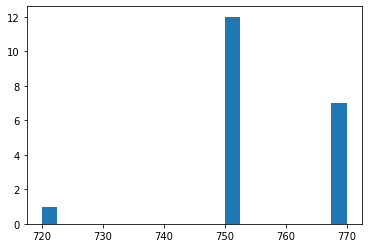

In [21]:
plt.hist(d['sum'],bins=20)

In [22]:
d.iloc[0]

0       CampaignA
1       CampaignA
2       CampaignA
3       CampaignB
4       CampaignB
5       CampaignB
6       CampaignC
7       CampaignC
8               -
9       CampaignC
sum           770
name          166
Name: 0, dtype: object

In [23]:
d.sort_values('sum')

,0,1,2,3,4,5,6,7,8,9,sum,name
19,CampaignA,CampaignA,CampaignB,CampaignB,CampaignB,CampaignA,-,CampaignC,CampaignC,CampaignC,720,220
17,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,191
16,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,211
15,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,95
14,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,149
13,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,59
12,CampaignA,CampaignB,CampaignA,CampaignB,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,203
11,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,9
10,CampaignA,CampaignB,CampaignB,CampaignA,CampaignB,CampaignA,CampaignC,CampaignC,-,CampaignC,750,131
9,CampaignA,CampaignB,CampaignA,-,CampaignB,CampaignA,CampaignC,CampaignC,CampaignB,CampaignC,750,205
